<a href="https://colab.research.google.com/github/orenfix10/ML-project1/blob/main/the_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ex1 - Unsupervised learning**

## Names and IDs

1.   oren fix 315666479
2.   nitzan bakalchuk 318595386


In this assignemnt you will practice unsupervised methods we saw in class, and specifically running K-means and visualizing the data using PCA.

In this assignment you will learn a few more things:

1.   Load local files
2.   Load data from Kaggle
3. Use Scikit-learn K-means
4. Use Scikit-learn PCA
5. Some visulaization
6. Evaluate the performance of the clustering using Elbow methods, Siouhette analysis and accuracy (as we have true labels)

Note:
* Read the complete task before implementing.
* Reuse code, write functions.

## Import All Packages
Add all imports needed for this notebook to run

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib as mat
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from tqdm import tqdm
from keras.datasets import mnist
from collections import defaultdict

# Text Clustering And Dimension Reduction

In this exercise you will cluster fake news using `k-means` and visualize the clustering using PCA.

**Import the Fake News Dataset from Kaggle**

Navigate to https://www.kaggle.com. Then go to the [Account tab of your user profile](https://www.kaggle.com/me/account) and select Create API Token. This will trigger the download of kaggle.json, a file containing your API credentials.

Then run the cell below and click the upload button to upload kaggle.json to your Colab runtime.

After uploading the kaggle.json the fake news dataset will be copy to the enviroment in the '/content' directory. You will see the two files 'Fake.csv' and 'True.csv'.

For more about the dataset you can read [here](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset).

In [ ]:
from google.colab import files

# upload kaggle.json file using user prompt
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

# download the dataset
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

# extract the files
!unzip '/content/fake-and-real-news-dataset.zip'

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 63 bytes
 81% 33.0M/41.0M [00:00<00:00, 64.3MB/s]
100% 41.0M/41.0M [00:00<00:00, 66.4MB/s]
Archive:  /content/fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


## 1. Read the csv files and create one single dataframe (5 points)

*   Create a dataframe which is the join of the two files 'Fake.csv' and 'True.csv'.
*   Extract the 'text' column from each dataframe (droping title, subject and date columns).
*   Create a single dataframe containing a text column and a label column (fake=0, real=1).

In [ ]:
# Implement here
# Example for reading one file. It will work if the previous step was successful.
face_df = pd.read_csv('/content/Fake.csv')
df_fake = pd.read_csv("/content/Fake.csv")
df_true = pd.read_csv("/content/True.csv")
df_fake['label']=0
df_true['label']=1
frames = [df_fake,df_true]
df_join = pd.concat(frames)
df = df_join[['text', 'label']]
df

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [ ]:
true_label = df['label'].to_numpy()



array([0, 0, 0, ..., 1, 1, 1])

## 2. Cluster the samples into 2 clusters (real and fake) (15 points)

*   Generate TF-IDF features by applying the TfidfVectorizer preprocessor using 1000 features (`max_features=1000`) and remove English stop words.
* Scale the data.
*    Apply k-Means algorithm on the TF-IDF features using n_clusters=2.

In [ ]:
tfidf = TfidfVectorizer(stop_words='english',max_features=1000)
fiting = tfidf.fit_transform(df['text'])
Scaler = preprocessing.StandardScaler()
x_scaled = Scaler.fit_transform(fiting.toarray())

df_tfidf = pd.DataFrame(x_scaled, columns=tfidf.get_feature_names())



df_tfidf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,10,100,11,12,13,14,15,16,17,...,working,world,wrong,wrote,year,years,yes,york,young,youtube
0,-0.312264,-0.270308,-0.210312,1.459728,-0.201095,-0.164567,-0.158347,-0.215335,-0.159684,-0.161096,...,-0.276717,-0.350613,2.042211,-0.242463,9.793219,2.372095,-0.16537,-0.292684,-0.193154,-0.144181
1,-0.312264,-0.270308,-0.210312,-0.195872,-0.201095,-0.164567,-0.158347,-0.215335,-0.159684,-0.161096,...,-0.276717,1.735007,-0.195610,-0.242463,-0.512032,-0.450821,-0.16537,4.495332,-0.193154,-0.144181
2,-0.312264,-0.270308,-0.210312,-0.195872,-0.201095,-0.164567,-0.158347,-0.215335,-0.159684,-0.161096,...,-0.276717,-0.350613,-0.195610,-0.242463,0.046667,-0.450821,-0.16537,-0.292684,-0.193154,-0.144181
3,-0.312264,-0.270308,-0.210312,-0.195872,-0.201095,-0.164567,-0.158347,-0.215335,-0.159684,-0.161096,...,1.862901,-0.350613,-0.195610,-0.242463,0.394799,-0.450821,-0.16537,-0.292684,-0.193154,-0.144181
4,-0.312264,-0.270308,-0.210312,-0.195872,-0.201095,-0.164567,-0.158347,-0.215335,-0.159684,-0.161096,...,-0.276717,1.534471,-0.195610,-0.242463,-0.512032,-0.450821,-0.16537,-0.292684,3.021840,-0.144181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,1.721993,-0.270308,-0.210312,1.563734,1.822955,-0.164567,-0.158347,1.660926,2.313051,-0.161096,...,-0.276717,-0.350613,-0.195610,-0.242463,0.218143,0.549263,-0.16537,-0.292684,-0.193154,-0.144181
44894,-0.312264,-0.270308,-0.210312,-0.195872,-0.201095,-0.164567,-0.158347,-0.215335,-0.159684,-0.161096,...,-0.276717,-0.350613,-0.195610,-0.242463,3.439467,-0.450821,-0.16537,-0.292684,-0.193154,-0.144181
44895,-0.312264,-0.270308,-0.210312,-0.195872,-0.201095,-0.164567,-0.158347,-0.215335,-0.159684,-0.161096,...,-0.276717,-0.350613,-0.195610,-0.242463,1.236493,4.338909,-0.16537,-0.292684,-0.193154,-0.144181
44896,-0.312264,-0.270308,-0.210312,-0.195872,-0.201095,-0.164567,-0.158347,-0.215335,-0.159684,-0.161096,...,-0.276717,4.323972,-0.195610,-0.242463,1.124464,-0.450821,-0.16537,-0.292684,-0.193154,-0.144181


In [ ]:
#k-means
def make_kmeans(n_clusters,xs):
  model = KMeans(n_clusters=n_clusters,random_state=0)
  lables = model.fit_predict(x_scaled)
  centers = model.cluster_centers_
  return lables,centers 



In [ ]:
make_kmeans(2,x_scaled)

(KMeans(n_clusters=2, random_state=0),
 array([1, 1, 1, ..., 0, 0, 0], dtype=int32),
 array([[ 0.08887212,  0.01391121,  0.00019672, ..., -0.01120289,
         -0.09939473, -0.13198248],
        [-0.11141803, -0.01744033, -0.00024663, ...,  0.01404495,
          0.12461011,  0.16546504]]))

## 3. Visualize using scatter plot (15 points)
The data is high dimensional, so for visualization purpose, we will perform a dimensionality reduction using PCA.

* Apply PCA
*   Visualize the clustering in 2d using first two PCs.
*   Visualize the clustering in 3d using first three PCs.

Notes:

*   In clustering visualization it's important to also visualize the centroids.
* Visualize using matplotlib scatter function. It can be used to plot 2D or 3D scatter plots.
* Color the points according to the true labels.

In [ ]:
#pca with 2 components
pca_2 = PCA(n_components=2)
pca_centers = pca_2.fit_transform(centers)
pca_2d = pca_2.fit_transform(x_scaled)
t = df["label"].to_numpy()
xs = pca_2d[:,0]
ys = pca_2d[:,1]
xc = pca_centers[:,0]
yc = pca_centers[:,1]
ones = np.where(t==1) # index where the label is 1
zero = np.where(t==0) # # index where the label is 0

In [ ]:
make_kmeans(3,x_scaled)

(KMeans(n_clusters=3, random_state=0),
 array([1, 0, 1, ..., 2, 2, 2], dtype=int32),
 array([[ 0.07755258,  0.04074124,  0.04136702, ...,  0.22893783,
         -0.08599577, -0.12287448],
        [-0.12707664, -0.02181873, -0.00734108, ..., -0.01172471,
          0.1308238 ,  0.18084066],
        [ 0.09804285, -0.00752902, -0.02710348, ..., -0.18796751,
         -0.09546506, -0.12840967]]))

In [ ]:
#pca with 3 n_components
pca_3 = PCA(n_components=3)
pca_centers = pca_2.fit_transform(centers)
pca_3d = pca_3.fit_transform(x_scaled)
t = df["label"].to_numpy()
xs = pca_3d[:,0]
ys = pca_3d[:,1]
zs = pca_3d[:,2]
xc = pca_centers[:,0]
yc = pca_centers[:,1]
zero = np.where(t==0) # # index where the label is 0
ones = np.where(t==1) # index where the label is 1
tows = np.where(t==2) # index where the label is 2

In [ ]:
def plot_2d(zero,ones):
  plt.scatter(xs[zero],ys[zero],c='green')
  plt.scatter(xs[ones],ys[ones],c='blue') 
  plt.scatter(xc, yc,c = "white")
  plt.show()


def plot_3d(zero,ones,tows):
  fig = plt.figure(figsize=(7,5))
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(xs[zero],ys[zero],zs[zero],c='green')
  ax.scatter(xs[ones],ys[ones],zs[ones],c='blue')
  ax.scatter(xc, yc,c = "white")

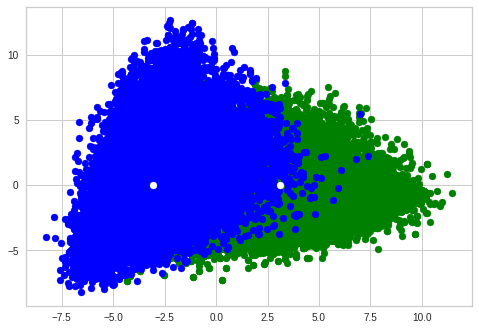

In [ ]:
plot_2d(zero,ones)

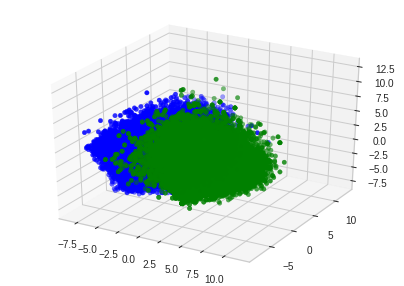

In [ ]:
plot_3d(zero,ones,tows)

## 4. Performance evaluation (15 points)
### How did our clustering perform against the real labels?

We do have the true lables (fake/real), but we don't know which cluster correspond to which label. Therefore, we check the two options:

*   Define cluster 1 as fake and cluster 2 as real. What is the accuracy?
*   Define cluster 1 as true and cluster 2 as fake. What is the accuracy?

In [ ]:
def accuracy(lables,true_lable):  
  count_true1 = 0
  for i in range(len(lables)):
    if true_label[i] == lables[i]:
      count_true1 += 1
  Accuracy1  =    count_true1/ len(true_label)

  count_true2 = 0
  for i in range(len(lables)):
    if true_label[i] != lables[i]:
      count_true2 += 1
  Accuracy2  =    count_true2/ len(true_label)
  return (f"Cluster 1 as fake :{Accuracy2}, Cluster 1 as real {Accuracy1}")

In [ ]:
accuracy(lables,true_label)

'Cluster 1 as fake :0.8714419350527863, Cluster 1 as real 0.1285580649472137'

## 5. Find optimal `k` (10 points)
What is the best k for clustering?

* Cluster using a range of `k` (up to 20) and compare the SSD and the Silhouette values for every k.
* Plot SSD vs. k and Silhouette score vs. k.

Notes:
* You can get the SSD of a clustering using the `inertia_` attribute of the model.
* Silhouette score using `silhouette_score` function from `sklearn.metrics`. This function accept the model and the data.
* Computing Silhouette may takes long time. Estimate the Silhouette using a sample of 300 samples uisng the argument `sample_size=300`.

In [ ]:
pca = PCA()
pca.fit(x_scaled)
x_pca = pca.transform(x_scaled)

In [ ]:
ssd = []
silhouette_avg = []
for i in tqdm(range(2,21)):
  model = KMeans(n_clusters=i,random_state=10)
  lables = model.fit_predict(x_pca)
  ssd.append((model.inertia_))
  silhouette_avg.append(silhouette_score(x_pca, lables, metric='euclidean',sample_size=300))




100%|██████████| 19/19 [34:16<00:00, 108.24s/it]


In [ ]:
ssd

[44477662.832418874,
 44241419.564299986,
 44077189.44865186,
 43927209.768963166,
 43792104.433656335,
 43655876.711677045,
 43520533.771585345,
 43394532.93274085,
 43280054.70597979,
 43227893.46031293,
 43142919.41735421,
 43042078.82137612,
 42923840.69779912,
 42845615.31025791,
 42764416.761989094,
 42639315.147493504,
 42605936.90156947,
 42558078.681778476,
 42449703.19566849]

In [ ]:
silhouette_avg

[0.01567996305628841,
 0.004749463954964123,
 0.007403491896224495,
 -0.014640463833188093,
 0.004304798933069501,
 -0.006316049550834283,
 -0.00897015648502732,
 -0.01435611781575421,
 -0.03516097174785963,
 -0.0024604334801733912,
 -0.005935850362830868,
 -0.0134726123540388,
 -0.030125506399297775,
 -0.04875247138019374,
 -0.03531596925583897,
 -0.05099999671891475,
 -0.07311088321904562,
 -0.016196018423954156,
 -0.046255750784080195]

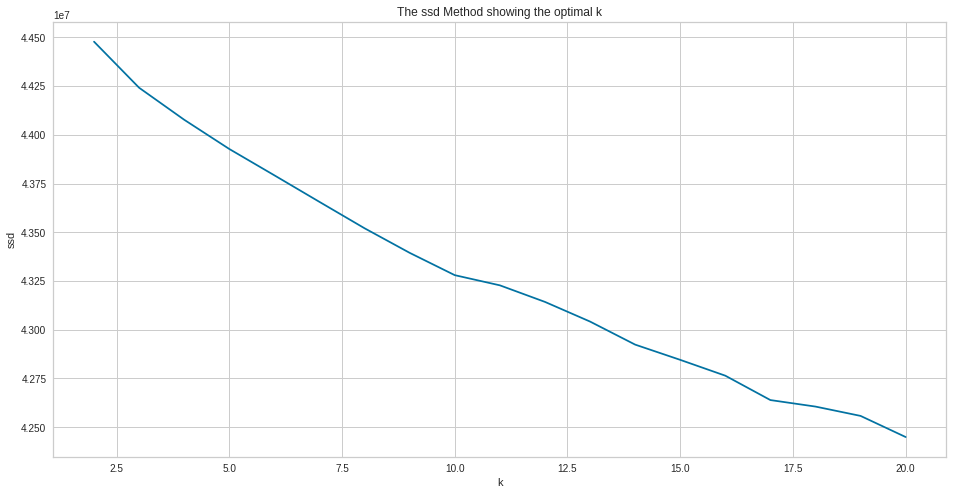

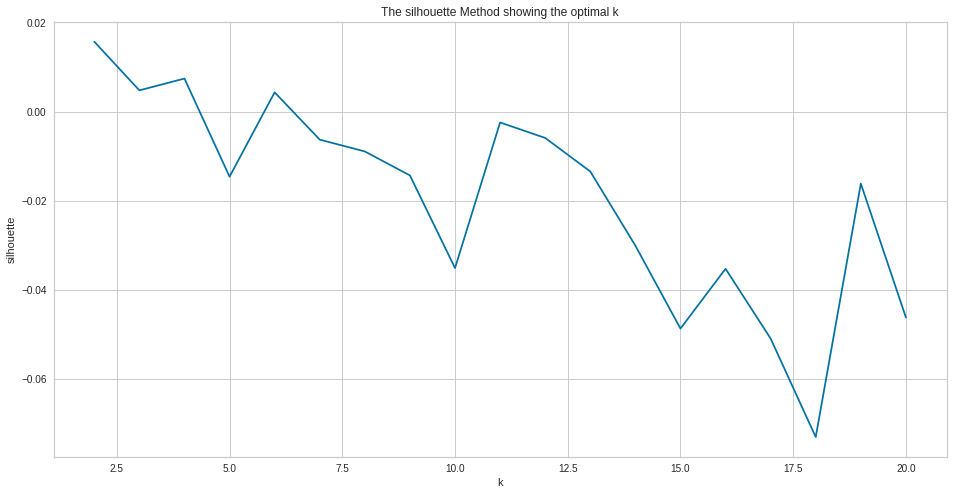

In [ ]:
K = [i for i in range(2,21)]
for f,n in [(ssd,"ssd"),(silhouette_avg,"silhouette")]:
  plt.figure(figsize=(16,8))
  plt.plot(K, f, 'bx-')
  count+=1
  plt.xlabel('k')
  plt.ylabel(n)
  plt.title(f'The {n} Method showing the optimal k')
  plt.show()

### 6. What is the optimal k for clustering? (10 points)

* Explain.
* If optimal k!=2 what can be a good explanation for this?


In our opinion, we believe that the optimal k differs from 2 when looking at the SSD score because when the number of clusters increases, more centroids are added, so that the sum of squared distance of samples to their closest cluster center decreases. however, this is not always our goal when we are looking for clustering the data into the optimal number of clusters.

Additionally, The choice of an optimal K also depends on the problem we are trying to solve, as we face a binary problem, choosing K greater than 2 is meaningless. 

# 7. PCA then k-means (10 points)

1.   List item
2.   List item


This time, lets try to change the order.
1. Generate TF-IDF 1000 features
2. Run PCA (using all dimenssions)
3. Run k-means
4. Plot 2D and 3D scatter plots
5. Estimate the accuracy according to true labels.
6. Explain how is it compared to the previous approach, where clustering is performed w/o PCA.

Note:
* When you compute the PCA, don't limit to first PCs, but use all of them.

In [ ]:
#pca 2 dim 
pca = PCA(n_components=1000)
pca_2d = pca.fit_transform(x_scaled)
t = df["label"].to_numpy()
xs = pca_2d[:,0]
ys = pca_2d[:,1]
zs = pca_2d[:,2]
zero = np.where(t==0) # # index where the label is 0
ones = np.where(t==1) # index where the label is 1
tows = np.where(t==2) # index where the label is 2 

In [ ]:
data = pd.DataFrame(data = pca_2d
             , columns = [f"PCA{i}" for i in range(1,1001)])

In [ ]:
data.values

array([[ 3.66458062, -0.75471274, -0.43606225, ...,  0.00787231,
        -0.03069592,  0.01062677],
       [ 2.05965002,  3.02116723, -2.71775845, ..., -0.02728091,
         0.03132076,  0.13198046],
       [ 3.37618655, -2.71996585, -2.04995087, ...,  0.03713737,
        -0.07502483,  0.01155605],
       ...,
       [-0.75572875, -0.02038483,  3.87379159, ..., -0.01970752,
        -0.03578379, -0.20580063],
       [-4.02950169, -1.83447765, -3.26599412, ...,  0.04677835,
        -0.06586753, -0.06492009],
       [-4.98169062, -0.02690166, -0.29547391, ..., -0.00821727,
        -0.3501388 , -0.05006678]])

In [ ]:
lables,centers = make_kmeans(2,data.values)

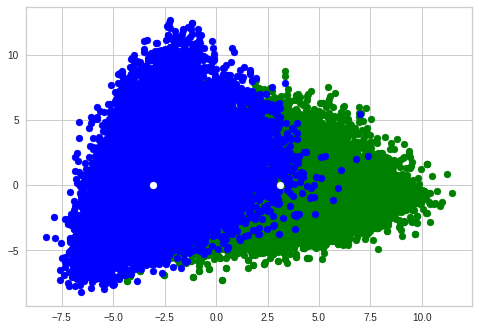

In [ ]:
plot_2d(zero,ones)

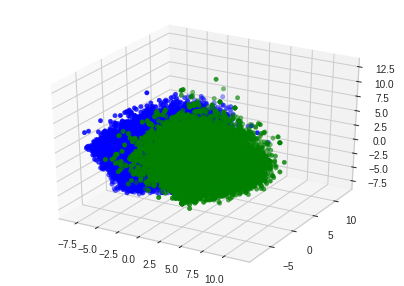

In [ ]:
plot_3d(zero,ones,tows)

In [ ]:
accuracy(lables,true_label)

'Cluster 1 as fake :0.8714419350527863, Cluster 1 as real 0.1285580649472137'

The order did not change the accuracy, same resolts w/o PCA.

Because we do not limit to first PCs, but use all of the dimensions so we do not losing information.

# MNIST clustering (10 points)
Redo the same analysis, but this time using the MNIST data set. Notice that this time there are actually 10 'true' clusters.

1. What is the accuracy of the clustering when using k=10?
   * When for computing the accuracy of 10 classes, first you need to define what is the label of each cluster. Do that by majority votes. In theory, you may get two or more clusters with the same labels. We will ignore that for now. Meaning that you don't need to bother in case there are two clusters with the same label according to the majority vote. Simply count what is the fraction of 'other' digits in each cluster.
2. What is the optimal k?
3. How do the results changes if you first run PCA?

In [ ]:
def load_mnist_dataset():
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  # reshape data
  x_train = x_train.reshape(x_train.shape[0], 784)
  x_test = x_test.reshape(x_test.shape[0], 784)
  return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = load_mnist_dataset()

In [ ]:
def get_true_labels_by_majority_votes(cluster_pred_labels, df_test):
  """
   This function compute accuracy by majority votes
   and returns new predictions, based on true labels
  """
  classes = defaultdict(list)  # keys = digits labels, values = original indexes
  for index, value in enumerate(cluster_pred_labels):
    classes[value] += [index]

  # find what is the majority vote of each digit class, using the indexes in y_train
  true_labels = {}
  for c in classes:
    class_majority_votes = defaultdict(int)
    for index in classes[c]: # for each index in the list of the digit
      class_majority_votes[df_test[index]] += 1
    max_vote = max(class_majority_votes, key=class_majority_votes.get) # the digit that was the most dominant in this class
    for index in classes[c]:
      true_labels[index] = max_vote

  sorted_true_labels = {k: v for k, v in sorted(list(true_labels.items()))}
  cluster_pred_labels_true = list(sorted_true_labels.values())
  return np.asarray(cluster_pred_labels_true)

In [ ]:
def create_single_df_bonus(x_train, y_train, x_test, y_test):
  """
   This function creates 2 unified df that contains both the train and test dataframes
  """
  # Create a single dataframe of train
  df_train = np.concatenate((x_train, x_test), axis=0)
  # Create a single dataframe of labels
  df_test = np.concatenate((y_train, y_test), axis=0)
  return df_train, df_test

In [ ]:
def kmeans_preictions(X, n_clusters):
  """
    X - the data, represented by TF-IDF.
    Generates K-means model and predicts the labels of the given X.
  """
  kmeans = KMeans(n_clusters, random_state=0)
  cluster_pred_labels = kmeans.fit_predict(X)
  centers = kmeans.cluster_centers_
  return cluster_pred_labels, kmeans,centers

In [ ]:
def dimensionality_reduction(X):
  """
  X - the data, represented by TF-IDF.
  This function reduces the dimensions of the given data.
  """
  pca = PCA()
  X_new = pca.fit_transform(X)
  return X_new

In [ ]:
x_train, y_train, x_test, y_test = load_mnist_dataset()
df_train, df_test = create_single_df_bonus(x_train, y_train, x_test, y_test) # concatenate the train and test to one df each
n_clusters = 10
dimensions = [2,3]
cluster_pred_labels, kmeans,centers = kmeans_preictions(df_train, n_clusters)
cluster_pred_labels_true = get_true_labels_by_majority_votes(cluster_pred_labels, df_test)
Train_new = dimensionality_reduction(df_train)
# for dim in dimensions:
#   print("Visualize using scatter plot of", dim, "dimentions TRUE LABELS:")
#   plot_clusters(Train_new, kmeans, dim, df_test)
#   print("Visualize using scatter plot of", dim, "dimentions PRED LABELS:")
#   plot_clusters(Train_new, kmeans, dim, cluster_pred_labels_true)


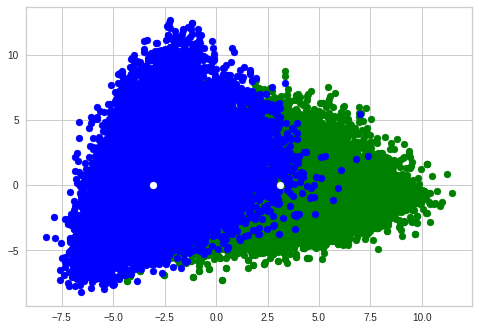

In [ ]:
plot_2d()

# Compute projection (10 points)
**Notice:** No code required in this section.

Given the next PCA projection matrix
$\begin{pmatrix}
1 & 1\\
2 & -1
\end{pmatrix}$
And the correspoding egienvalues
$(5, -1)$

Compute the projection to one dimension of the next two vectors:
\begin{pmatrix}
1 & 3
\end{pmatrix}
\begin{pmatrix}
3 & 7
\end{pmatrix}

In [ ]:
# Answer here and show your computations (no code)

*Your answers here*

